In [ ]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in Kaggle dataset
os.chdir('/Users/homanchan/.kaggle/data/')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
columns = train_data.columns.to_list()
print(columns)

['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [12]:
numeric_col = train_data.select_dtypes("number").columns.to_list()
print(numeric_col)

['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


In [14]:
categorical_col = train_data.select_dtypes("object").columns.to_list()
print(categorical_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [17]:
train_data[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]].describe()

,age,balance,day,duration,campaign,pdays,previous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000


In [32]:
# Check if target is unbalanced
train_resp = sum(train_data["y"]) / len(train_data)
print(f' {"Train data response rate: "} {train_resp: .2%}')

 Train data response rate:   12.07%


In [47]:
y_1 = train_data[train_data["y"] == 1]
y_0 = train_data[train_data["y"] == 0]

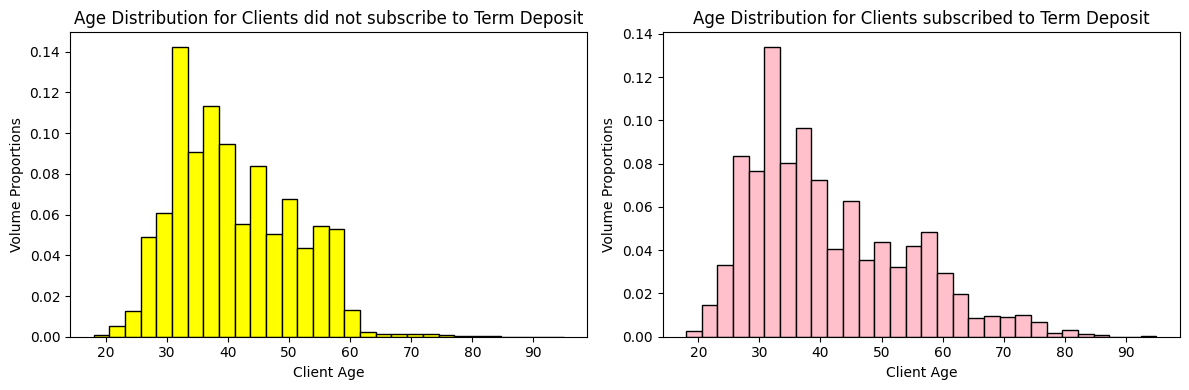

In [61]:
# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(y_0["age"], weights=np.ones(len(y_0)) / len(y_0), bins=30, color='Yellow', edgecolor='black')
axes[0].set_title('Age Distribution for Clients did not subscribe to Term Deposit')

axes[1].hist(y_1["age"], weights=np.ones(len(y_1)) / len(y_1), bins=30, color='Pink', edgecolor='black')
axes[1].set_title('Age Distribution for Clients subscribed to Term Deposit')

# Adding labels and title
for ax in axes:
    ax.set_xlabel('Client Age')
    ax.set_ylabel('Volume Proportions')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

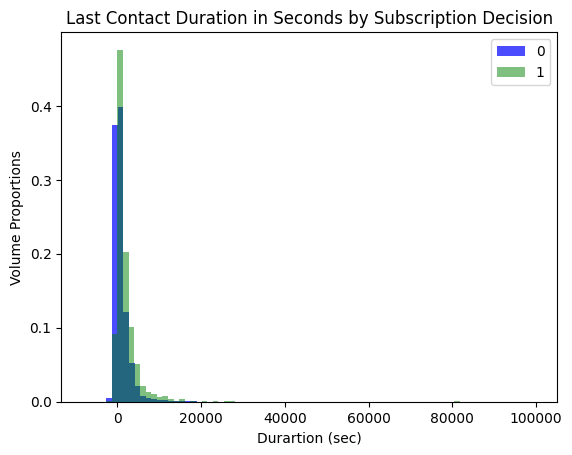

In [108]:
plt.hist(y_0['balance'], weights=np.ones(len(y_0)) / len(y_0), bins=80, color='blue', alpha=0.7, label='0')
plt.hist(y_1['balance'], weights=np.ones(len(y_1)) / len(y_1), bins=80, color='green', alpha=0.5, label='1')

plt.title("Last Contact Duration in Seconds by Subscription Decision")
plt.ylabel("Volume Proportions")
plt.xlabel("Durartion (sec)")

plt.legend(loc='upper right')

# Display it
plt.show()

/var/folders/0b/9lgny2y16wzchg690bgz_gl40000gn/T/ipykernel_7543/1346581558.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(x=[group.values for name, group in grouped],


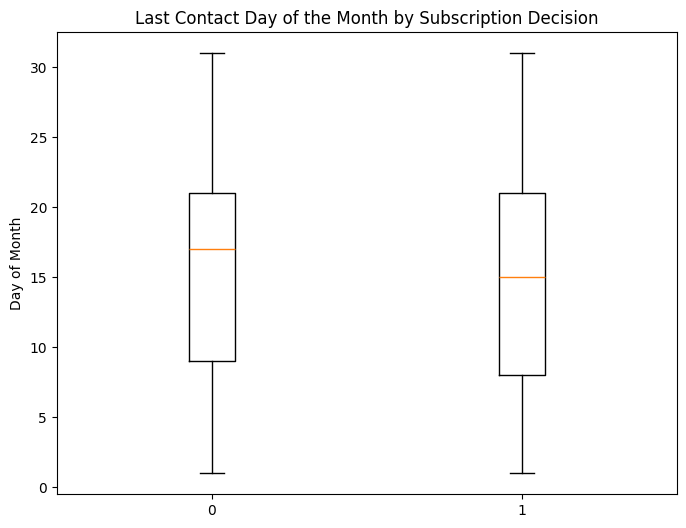

In [72]:
# Group our dataset with our 'Group' variable
grouped = train_data.groupby('y')['day']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

plt.title("Last Contact Day of the Month by Subscription Decision")
plt.ylabel("Day of Month")

# Display it
plt.show()

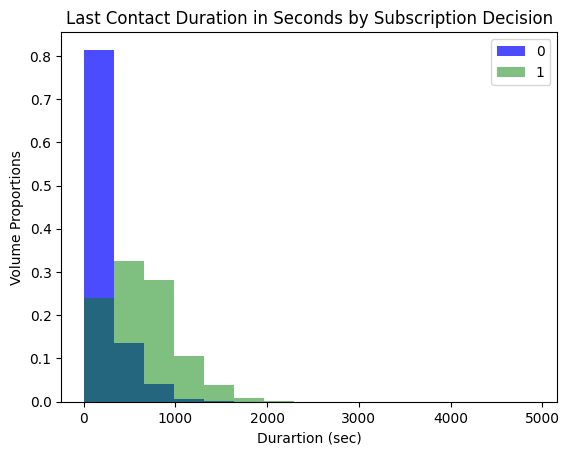

In [87]:
plt.hist(y_0['duration'], weights=np.ones(len(y_0)) / len(y_0), bins=15, color='blue', alpha=0.7, label='0')
plt.hist(y_1['duration'], weights=np.ones(len(y_1)) / len(y_1), bins=15, color='green', alpha=0.5, label='1')

plt.title("Last Contact Duration in Seconds by Subscription Decision")
plt.ylabel("Volume Proportions")
plt.xlabel("Durartion (sec)")

plt.legend(loc='upper right')

# Display it
plt.show()

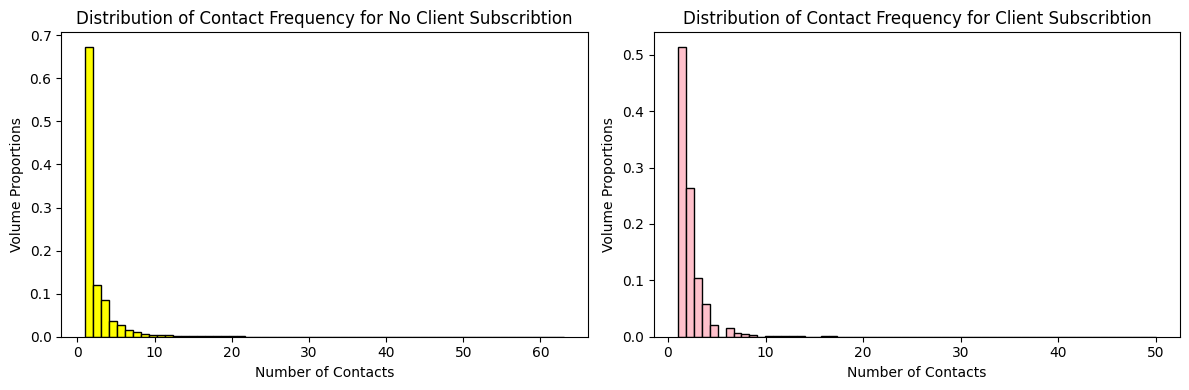

In [96]:
# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(y_0["campaign"], weights=np.ones(len(y_0)) / len(y_0), bins=60, color='Yellow', edgecolor='black')
axes[0].set_title('Distribution of Contact Frequency for No Client Subscribtion')

axes[1].hist(y_1["campaign"], weights=np.ones(len(y_1)) / len(y_1), bins=60, color='Pink', edgecolor='black')
axes[1].set_title('Distribution of Contact Frequency for Client Subscribtion')

# Adding labels and title
for ax in axes:
    ax.set_xlabel('Number of Contacts')
    ax.set_ylabel('Volume Proportions')

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [124]:
pdays_NoContact = len(train_data[train_data["pdays"] == -1]) / len(train_data)

print(f' {"The proportions of clients not previously contacted :"} {pdays_NoContact: .2%}')

 The proportions of clients not previously contacted :  89.66%


In [125]:
previous_NoContact = len(train_data[train_data["previous"] == 0]) / len(train_data)

print(f' {"The proportions of clients not contacted before this campaign :"} {previous_NoContact: .2%}')

 The proportions of clients not contacted before this campaign :  89.66%


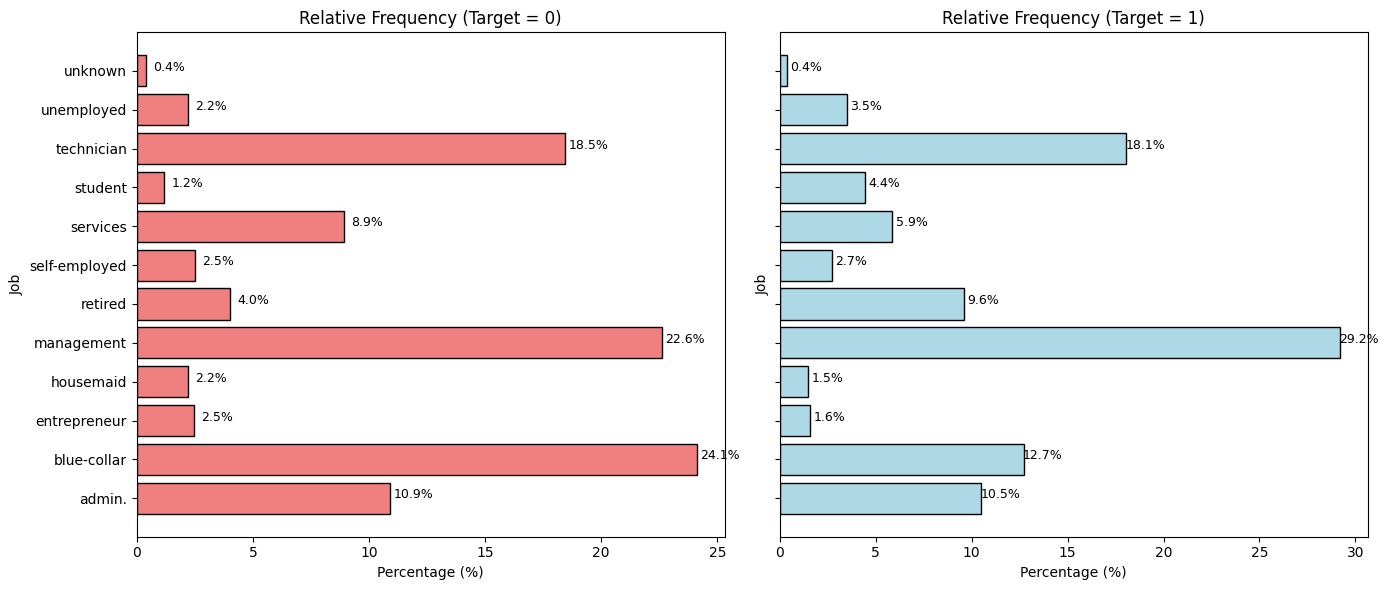

In [ ]:
# Filter and calculate relative frequencies
freq_0 = y_0['job'].value_counts(normalize=True) * 100
freq_1 = y_1['job'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['job'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Job')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


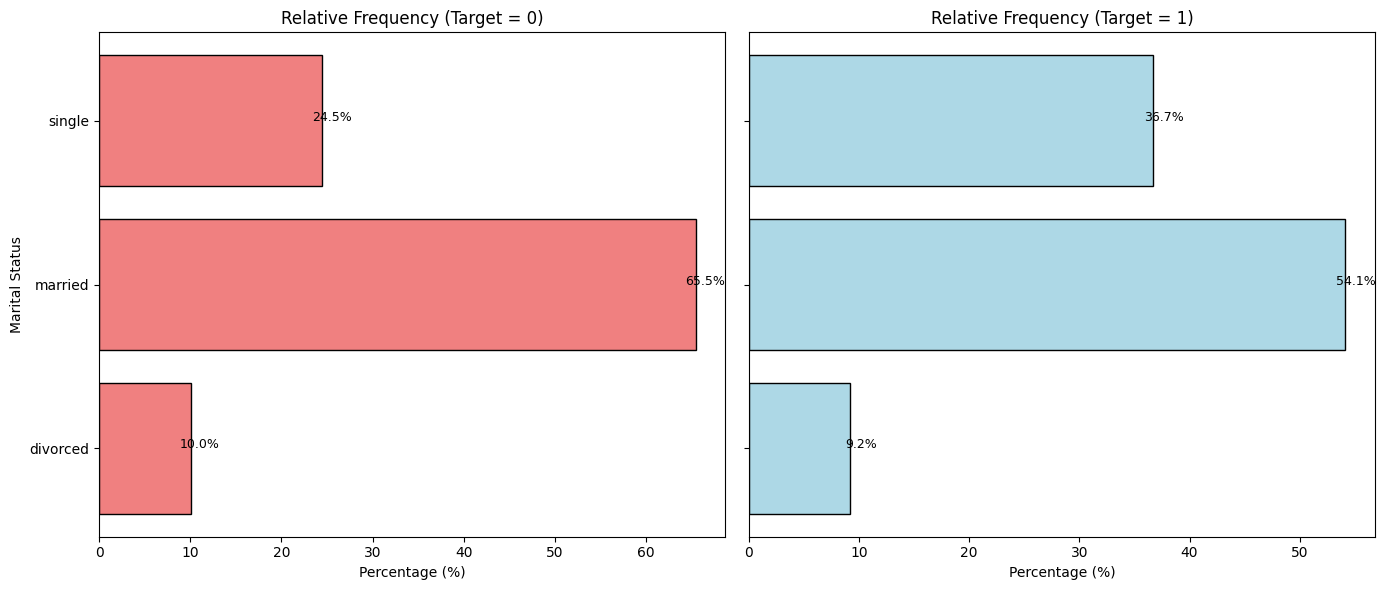

In [165]:
# Filter and calculate relative frequencies
freq_0 = y_0['marital'].value_counts(normalize=True) * 100
freq_1 = y_1['marital'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['marital'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Marital Status')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

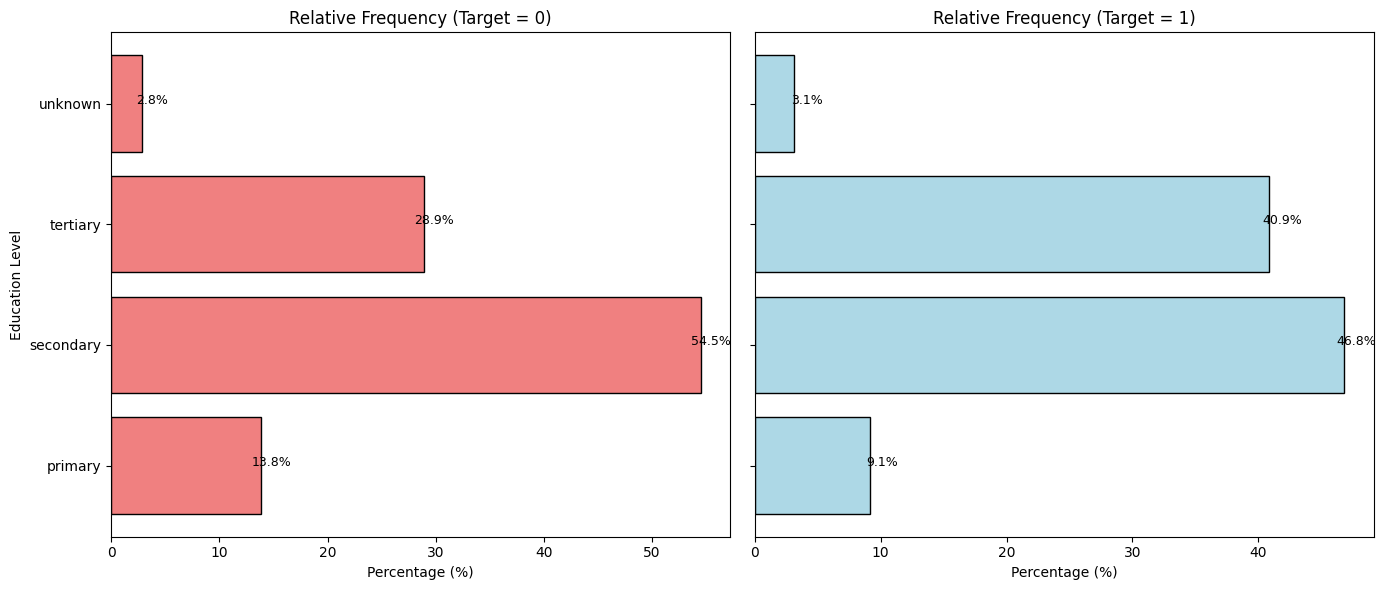

In [167]:
# Filter and calculate relative frequencies
freq_0 = y_0['education'].value_counts(normalize=True) * 100
freq_1 = y_1['education'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['education'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Education Level')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

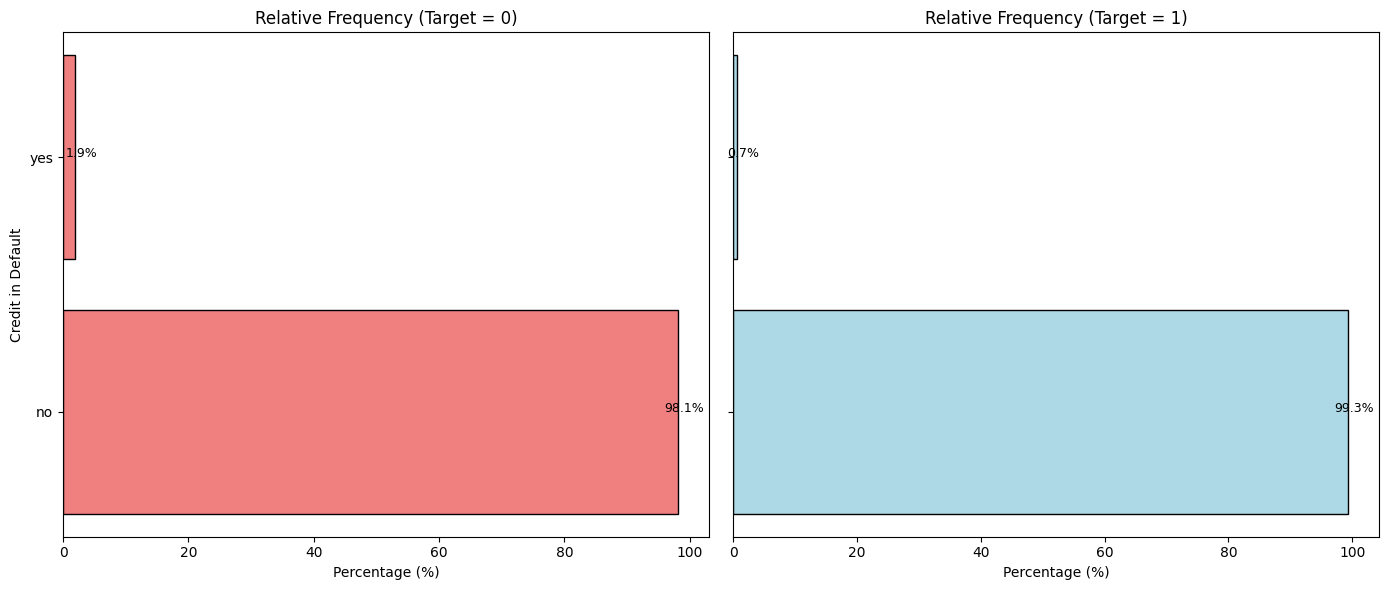

In [169]:
# Filter and calculate relative frequencies
freq_0 = y_0['default'].value_counts(normalize=True) * 100
freq_1 = y_1['default'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['default'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Credit in Default')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

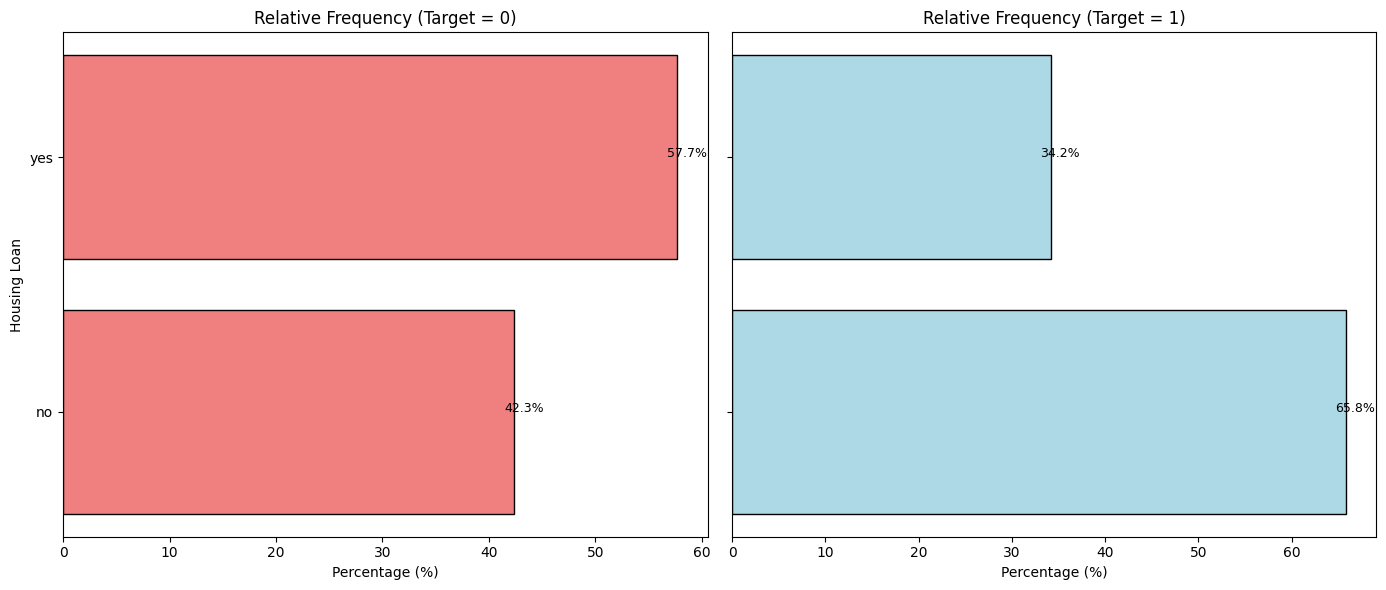

In [170]:
# Filter and calculate relative frequencies
freq_0 = y_0['housing'].value_counts(normalize=True) * 100
freq_1 = y_1['housing'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['housing'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Housing Loan')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

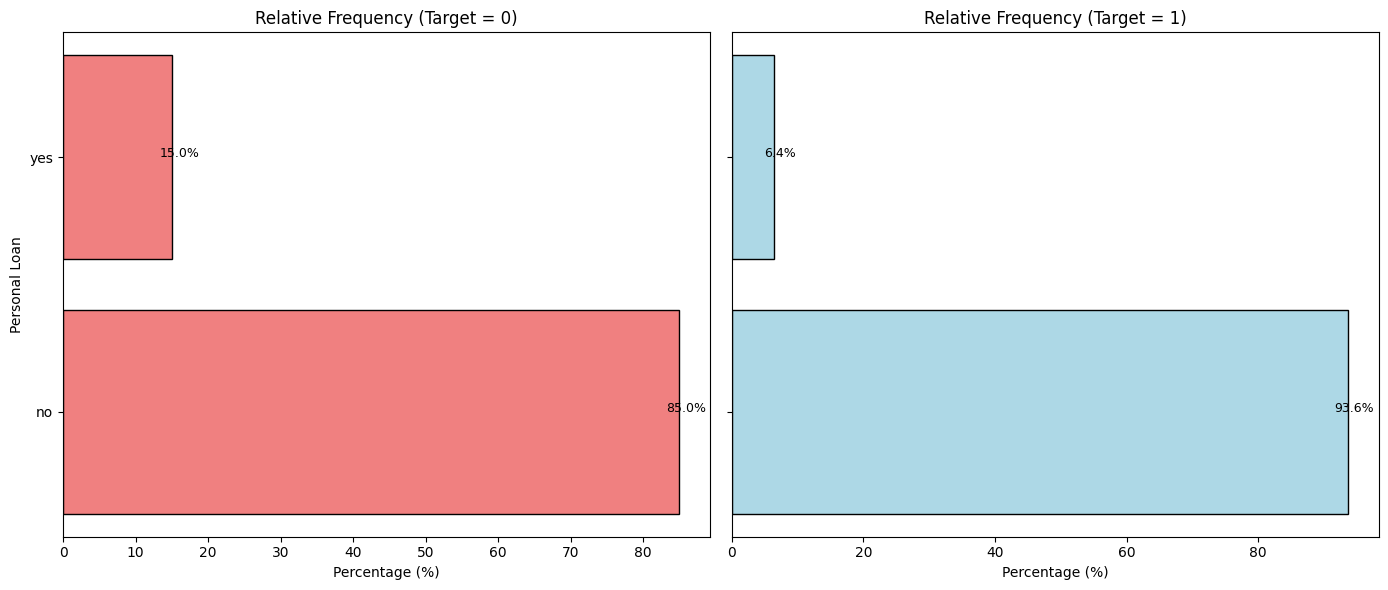

In [171]:
# Filter and calculate relative frequencies
freq_0 = y_0['loan'].value_counts(normalize=True) * 100
freq_1 = y_1['loan'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['loan'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Personal Loan')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

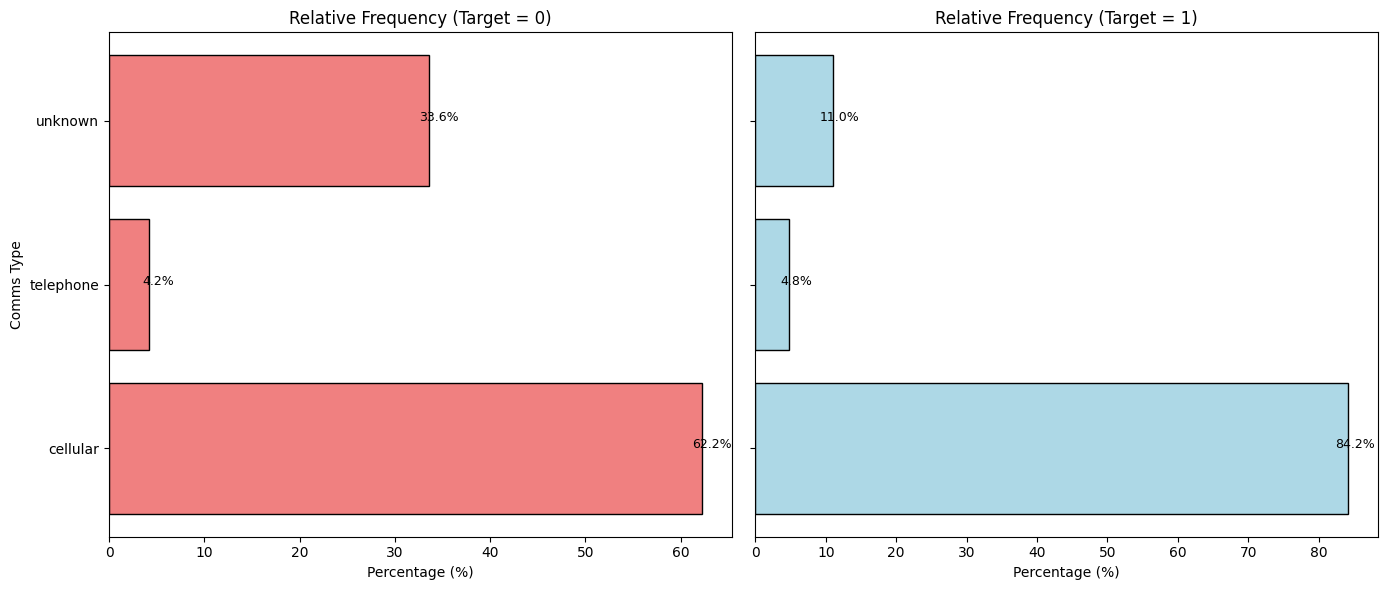

In [173]:
# Filter and calculate relative frequencies
freq_0 = y_0['contact'].value_counts(normalize=True) * 100
freq_1 = y_1['contact'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['contact'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Comms Type')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

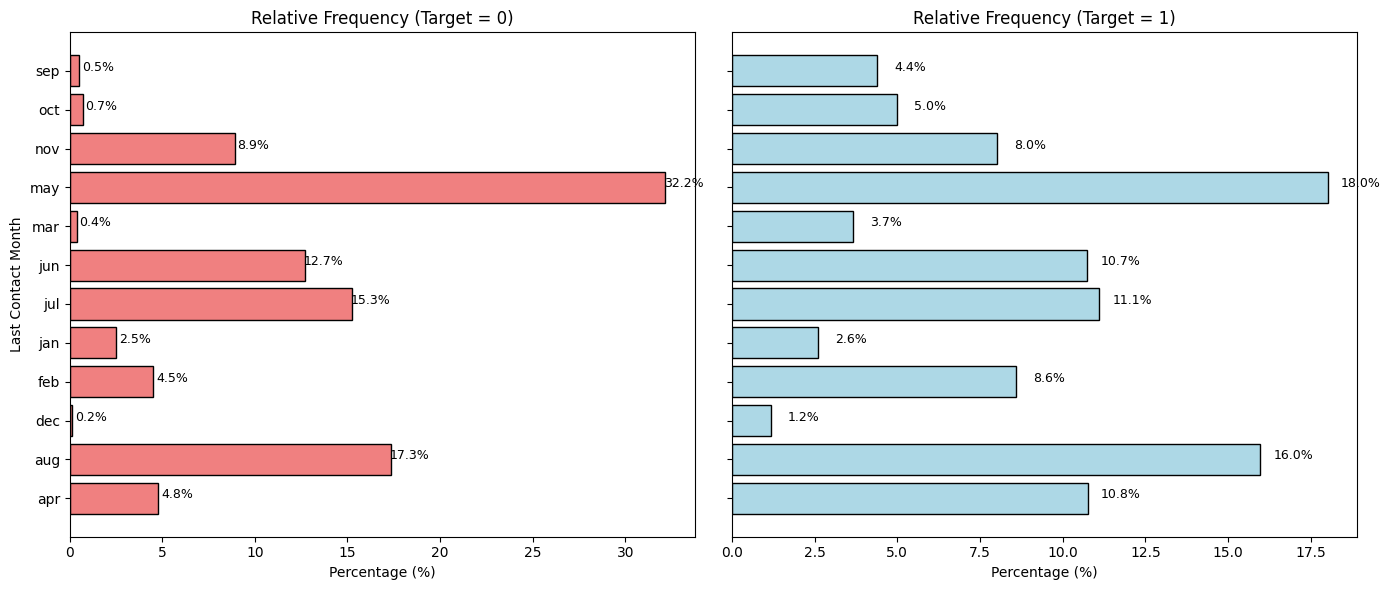

In [174]:
# Filter and calculate relative frequencies
freq_0 = y_0['month'].value_counts(normalize=True) * 100
freq_1 = y_1['month'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['month'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Last Contact Month')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

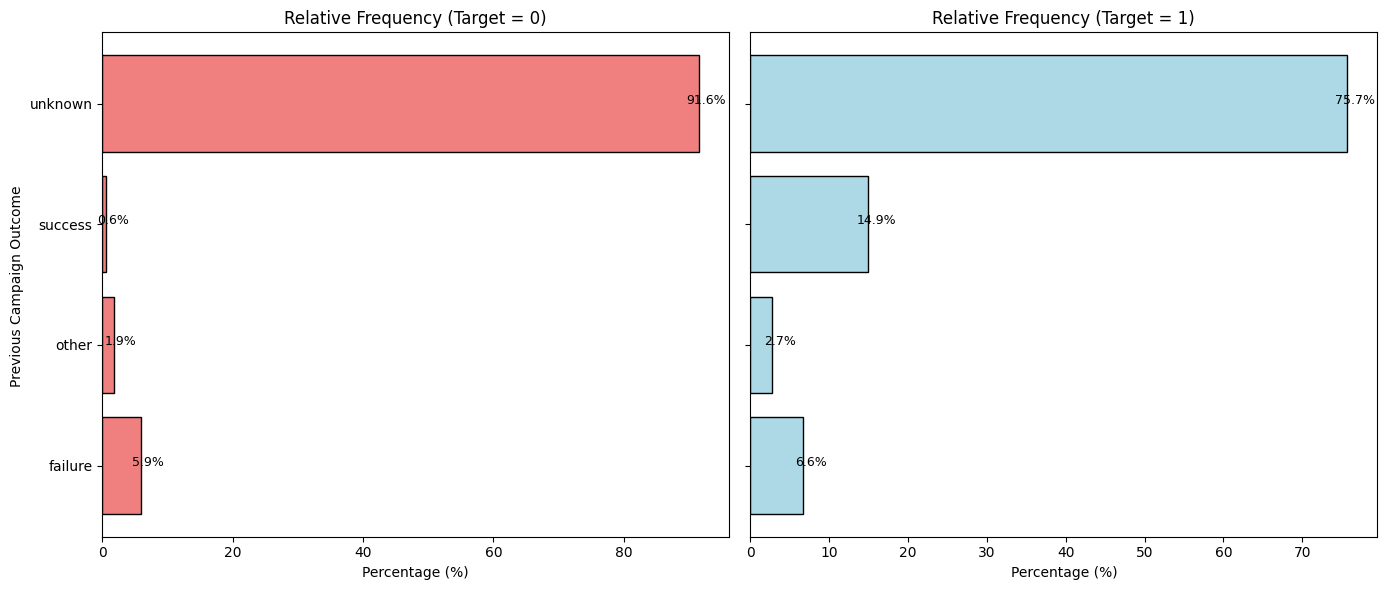

In [175]:
# Filter and calculate relative frequencies
freq_0 = y_0['poutcome'].value_counts(normalize=True) * 100
freq_1 = y_1['poutcome'].value_counts(normalize=True) * 100

# Sort categories for consistent x-axis
categories = sorted(train_data['poutcome'].unique())

# Ensure all categories are represented (even if frequency is 0)
freq_0 = freq_0.reindex(categories, fill_value=0)
freq_1 = freq_1.reindex(categories, fill_value=0)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Chart for Target = 0
axes[0].barh(categories, freq_0, color='lightcoral', edgecolor='black')
axes[0].set_title('Relative Frequency (Target = 0)')
axes[0].set_ylabel('Previous Campaign Outcome ')
axes[0].set_xlabel('Percentage (%)')

# Chart for Target = 1
axes[1].barh(categories, freq_1, color='lightblue', edgecolor='black')
axes[1].set_title('Relative Frequency (Target = 1)')
axes[1].set_xlabel('Percentage (%)')

# Annotate bars
for ax, freq in zip(axes, [freq_0, freq_1]):
    for i, value in enumerate(freq):
        ax.text(value + 1, i, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()